# Linear regression : GD

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataFile = pd.read_csv("weatherww2/SummaryofWeather.csv", low_memory=False)

In [3]:
dataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

In [4]:
dataFile.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataFile = dataFile.dropna(axis=1)

In [6]:
dataFile.head(20)

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,YR,MO,DA
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,42,7,1
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,42,7,2
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,42,7,3
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,42,7,4
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,42,7,5
5,10001,1942-7-6,0,26.666667,21.666667,24.444444,42,7,6
6,10001,1942-7-7,T,28.333333,22.777778,25.555556,42,7,7
7,10001,1942-7-8,3.556,26.666667,22.222222,24.444444,42,7,8
8,10001,1942-7-9,T,27.222222,22.777778,25.000000,42,7,9
9,10001,1942-7-10,3.556,25.555556,21.666667,23.333333,42,7,10


/Users/abhaymone/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


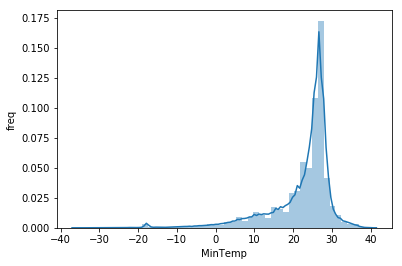

In [7]:
sns.distplot(dataFile.iloc[:,5].values)
plt.xlabel("MinTemp")
plt.ylabel("freq")
plt.show()

In [8]:
#selecting first 1000 rows
minTemp = dataFile.iloc[0:1000,5].values
maxTemp = dataFile.iloc[0:1000,4].values
nRows = 1000

In [9]:
#maxTemp =  theta1 . minTemp
theta0 = 0
theta1 = 0
epoch = 10000
costFunction = 0
learningRate = 0.00005
# from sklearn.preprocessing import StandardScaler
# scl = StandardScaler()
# minTemp = scl.fit_transform(minTemp.reshape(-1,1))
# maxTemp = scl.fit_transform(maxTemp.reshape(-1,1))

Gradient descent functions

In [10]:
def getCostFunction(theta0,theta1) :
    sum = 0
    for i in range(0,nRows):
        hypothesis =theta0 + theta1* minTemp[i]
        error = hypothesis - maxTemp[i]
        sum = sum + error*error
    return (1/(2*nRows))*sum

def getderiValueThetaZero(learningRate,theta0,  theta1) :
    sum = 0
    for i in range(0,nRows):
        hypothesis = theta0 + theta1* minTemp[i]
        error = hypothesis - maxTemp[i]
        sum = sum + error
    return (learningRate/nRows)*sum

def getderiValueThetaOne(learningRate,theta0, theta1) :
    sum = 0
    for i in range(0,nRows):
        hypothesis = theta0+ theta1* minTemp[i]
        error = (hypothesis - maxTemp[i])*minTemp[i]
        sum = sum + error
    return (learningRate/nRows)*sum

In [11]:
thetaZero = []
thetaOne = []
costFunc = []
for i in range(0,epoch):
    drWRTz = getderiValueThetaZero(theta0=theta0,theta1= theta1,learningRate=learningRate)
    drWRTo = getderiValueThetaOne(theta0=theta0, theta1=theta1,learningRate=learningRate)
    costFunc.append(getCostFunction( theta0 = theta0,theta1= theta1))
    theta0 = theta0 - drWRTz
    theta1 = theta1 - drWRTo
    thetaZero.append(theta0)
    thetaOne.append(theta1)  
    if(i%100 == 0) :
        print("theta0:",theta0," theta1:",theta1)
      

theta0: 0.0011232777777669988  theta1: 0.029859429012576766
theta0: 0.03106162159354928  theta1: 0.8235842805779048
theta0: 0.031990234305260296  theta1: 0.845418262303884
theta0: 0.03212069365487776  theta1: 0.8460150425883638
theta0: 0.03222919092201602  theta1: 0.8460275192136452
theta0: 0.03233708162636494  theta1: 0.8460239198521716
theta0: 0.0324449533270376  theta1: 0.8460198782755857
theta0: 0.03255282218972681  theta1: 0.8460158246192476
theta0: 0.03266068865925394  theta1: 0.8460117707175638
theta0: 0.03276855274790858  theta1: 0.8460077168961349
theta0: 0.03287641445607988  theta1: 0.8460036631639171
theta0: 0.03298427378382964  theta1: 0.8459996095211547
theta0: 0.03309213073121066  theta1: 0.8459955559678529
theta0: 0.03319998529827546  theta1: 0.8459915025040098
theta0: 0.03330783748507659  theta1: 0.8459874491296234
theta0: 0.03341568729166657  theta1: 0.8459833958446916
theta0: 0.03352353471809796  theta1: 0.8459793426492125
theta0: 0.033631379764423285  theta1: 0.84597

In [12]:
thetaOne = np.asarray(thetaOne, dtype=np.float32)
thetaZero = np.asarray(thetaZero, dtype=np.float32)
costF = np.asarray(costFunc, dtype=np.float32)

In [13]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Data to plot.
# x, y = np.meshgrid(thetaZero,thetaOne)
# z =np.sqrt(x**2 + y**2)



In [14]:
# fig, ax = plt.subplots()
# CS = ax.contour(x, y, z)
# ax.clabel(CS, inline=1, fontsize=10)
# ax.set_title('Simplest default with labels')

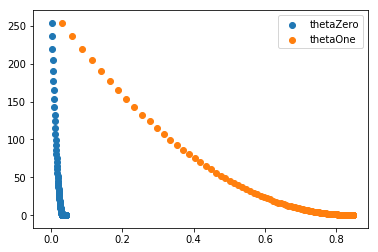

In [28]:
fig, ax1 = plt.subplots()
ax1.scatter(thetaZero, costF, label = 'thetaZero')
ax1.scatter(thetaOne, costF,   label = 'thetaOne')
plt.legend()
plt.show()

In [29]:
y_bar = []
for i in range(0,nRows):
    y_bar.append(theta0 + theta1* minTemp[i])

y_bar = np.asarray(y_bar, dtype=np.float32)

/Users/abhaymone/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


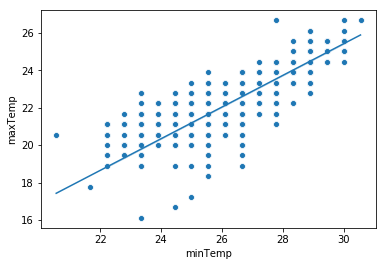

In [30]:
sns.scatterplot(x=minTemp, y= maxTemp)
sns.lineplot(x=minTemp, y= y_bar)
plt.xlabel("minTemp")
plt.ylabel("maxTemp")
plt.show()